## Pandas

In [1]:
a = [1,2,3]
type(a)

list

In [2]:
import numpy 
na = numpy.array(a)
na

array([1, 2, 3])

In [3]:
type(na)

numpy.ndarray

In [4]:
na + 3

array([4, 5, 6])

In [5]:
na ** 2

array([1, 4, 9])

In [6]:
import pandas
pa = pandas.Series(a)

In [7]:
pa

0    1
1    2
2    3
dtype: int64

In [8]:
customers = [
 {'name': 'John', 'gender': 'M', 'age':32},
 {'name': 'Mary', 'gender': 'F', 'age':18}
]

In [10]:
import pandas
df = pandas.DataFrame(customers)
df

,age,gender,name
0,32,M,John
1,18,F,Mary


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
age       2 non-null int64
gender    2 non-null object
name      2 non-null object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


In [12]:
df.describe()

,age
count,2.000000
mean,25.000000
std,9.899495
min,18.000000
25%,21.500000
50%,25.000000
75%,28.500000
max,32.000000


In [13]:
df.head(1)

,age,gender,name
0,32,M,John


In [14]:
df[df['gender'] == 'M']

,age,gender,name
0,32,M,John


## Pandas 進階分析

In [15]:
import pandas as pd
namesall = []
for year in range(1880, 2011):
    path = 'names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    df['year'] = year
    namesall.append(df)


In [16]:
len(namesall)

131

In [18]:
type(namesall[0])

pandas.core.frame.DataFrame

In [19]:
df_names =  pd.concat(namesall, ignore_index=True)


In [21]:
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [24]:
#df_names['sex'] == 'M'

In [25]:
df_last_letter = df_names[df_names['sex'] == 'M']

In [30]:
n = 'John'
n[-1]

'n'

In [32]:
df_last_letter['last_letter'] = df_last_letter['name'].str[-1]

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_last_letter.head(10)

,name,sex,births,year,last_letter
942,John,M,9655,1880,n
943,William,M,9533,1880,m
944,James,M,5927,1880,s
945,Charles,M,5348,1880,s
946,George,M,5126,1880,e
947,Frank,M,3242,1880,k
948,Joseph,M,2632,1880,h
949,Thomas,M,2534,1880,s
950,Henry,M,2444,1880,y
951,Robert,M,2416,1880,t


In [52]:
table = df_last_letter.pivot_table('births', index = 'last_letter',columns = ['year'], aggfunc=sum)

In [36]:
#table

In [37]:
subtable = table[[1906, 1956, 2006]]

In [39]:
?subtable.head()

In [38]:
subtable.head()

year,1906,1956,2006
last_letter,,,
a,654.0,4936.0,36156.0
b,276.0,1980.0,42600.0
c,315.0,9848.0,26635.0
d,14892.0,285524.0,51410.0
e,19721.0,175848.0,142999.0


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


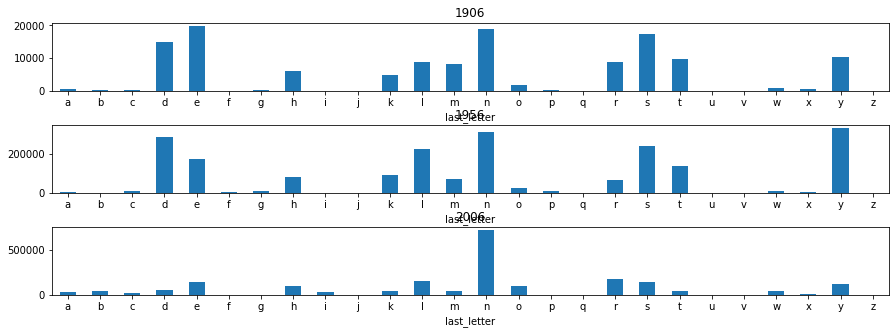

In [41]:
%pylab inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

subtable[1906].plot(kind='bar', rot=0, ax=axes[0], title='1906')
subtable[1956].plot(kind='bar', rot=0, ax=axes[1], title='1956')
subtable[2006].plot(kind='bar', rot=0, ax=axes[2], title='2006')

plt.show()


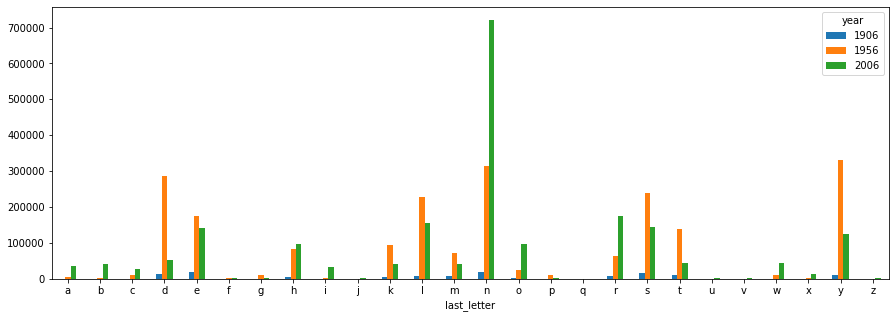

In [42]:
subtable.plot(kind='bar', rot=0, figsize=(15, 5))


In [45]:
subtable.sum(axis=0)

year
1906     133159.0
1956    2113067.0
2006    2050234.0
dtype: float64

In [46]:
subtable.sum(axis=1)

last_letter
a      41746.0
b      44856.0
c      36798.0
d     351826.0
e     338568.0
f       4879.0
g      14059.0
h     188857.0
i      34824.0
j       1241.0
k     141384.0
l     392811.0
m     121569.0
n    1054687.0
o     122331.0
p      15185.0
q        430.0
r     249869.0
s     400640.0
t     191114.0
u       2305.0
v       2077.0
w      56122.0
x      18212.0
y     466588.0
z       3482.0
dtype: float64

In [47]:
ratio_subtable = subtable / subtable.sum(axis=0)


In [48]:
ratio_subtable

year,1906,1956,2006
last_letter,,,
a,0.004911,0.002336,0.017635
b,0.002073,0.000937,0.020778
c,0.002366,0.004661,0.012991
d,0.111836,0.135123,0.025075
e,0.148101,0.083219,0.069748
f,0.001044,0.001312,0.000960
g,0.001998,0.005615,0.000941
h,0.045239,0.039921,0.048032
i,0.000804,0.000548,0.016368


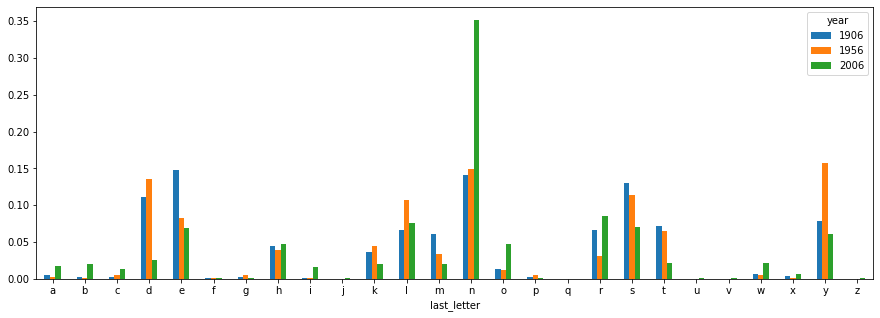

In [49]:
ratio_subtable.plot(kind='bar', rot=0, figsize=(15, 5))


In [53]:
ratio_table = table / table.sum(axis=0)


In [54]:
ratio_table


year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
a,0.007023,0.007613,0.006799,0.007235,0.007139,0.006614,0.006996,0.006903,0.006777,0.006366,...,0.020162,0.020019,0.019177,0.019505,0.018481,0.017635,0.016747,0.016189,0.015927,0.014980
b,0.004607,0.004665,0.004451,0.004320,0.004334,0.004091,0.004080,0.004280,0.003872,0.003517,...,0.026256,0.025418,0.024368,0.023171,0.021645,0.020778,0.020357,0.019655,0.019693,0.020470
c,0.003159,0.003285,0.003070,0.002858,0.002787,0.002792,0.002554,0.002574,0.002524,0.002450,...,0.013972,0.014048,0.014042,0.013514,0.013083,0.012991,0.012983,0.012458,0.012186,0.012181
d,0.083055,0.083247,0.085340,0.084066,0.086120,0.085472,0.087647,0.089072,0.087707,0.091934,...,0.031352,0.028794,0.027069,0.026118,0.025420,0.025075,0.024451,0.023574,0.023398,0.023387
e,0.122116,0.123139,0.128537,0.126070,0.127895,0.130313,0.130658,0.130280,0.130270,0.130111,...,0.074927,0.074603,0.073396,0.071710,0.070799,0.069748,0.069445,0.069362,0.068663,0.067959
f,0.000977,0.000824,0.001187,0.001013,0.001145,0.001067,0.001011,0.001223,0.001158,0.001121,...,0.000906,0.000937,0.000922,0.000961,0.000996,0.000960,0.001010,0.001080,0.001121,0.001188
g,0.001330,0.001449,0.001284,0.001290,0.001398,0.001688,0.001273,0.001154,0.001572,0.001121,...,0.001108,0.001075,0.001019,0.000927,0.000944,0.000941,0.000986,0.001013,0.001214,0.001404
h,0.036645,0.037380,0.036732,0.037512,0.037066,0.037615,0.036891,0.038960,0.038376,0.038530,...,0.044297,0.045429,0.044729,0.045227,0.046404,0.048032,0.048044,0.049328,0.050664,0.051670
i,0.001810,0.002045,0.001821,0.001596,0.001381,0.001364,0.001544,0.001371,0.001498,0.001393,...,0.010812,0.012177,0.013187,0.014383,0.015711,0.016368,0.017026,0.018772,0.020732,0.022628


In [56]:
dny = ratio_table.loc[['d', 'n', 'y']]


In [59]:
#dny.plot(kind='line', rot=0)


In [62]:
dny.T.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


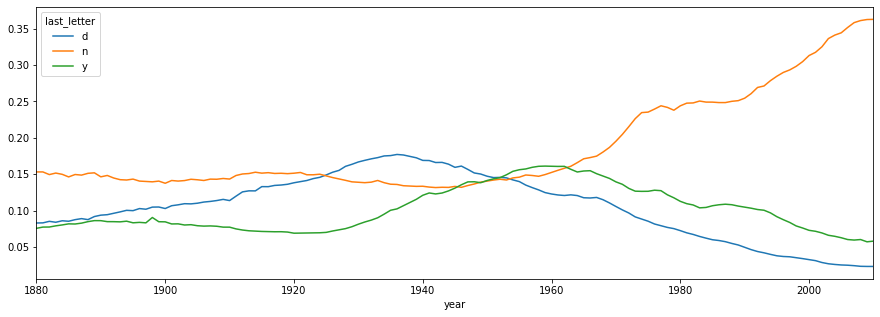

In [63]:
dny.T.plot(rot=0, figsize=(15, 5))


## 小測驗

- 請使用pandas 的聚合(Aggregation)功能，統計菜市場名排行前十名男性的名字
- 請將前十菜市場男性名從1880年到2010 年的出生數量變化，用折線圖繪出 (x = 年, y= 出生數, 線: 前十菜市場名)
